In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
from scipy.stats import norm, t
import random
import math
from scipy.stats import chi2

## Accept - Reject Method

Here we take a standard normal distribution taking it as the proposal distribution we stimulate t

In [2]:
standard_normal = norm(loc=0, scale=1)

In [3]:
# setting the degrees of freedom
nu = 5
# M = t.pdf(0, nu) /standard_normal.pdf(0)
M = 10

In [4]:
num_samples = 1000

In [5]:
startTime = datetime.datetime.now()
samples = []
while len(samples) < num_samples:
    u = np.random.uniform(0,1)
    x = np.random.uniform(-500,500)
    if u <= t.pdf(x, nu) / t.pdf(0, nu):
        samples.append(x)
endTime = datetime.datetime.now()

In [6]:
# startTime = datetime.datetime.now()
# # Generate samples using the accept-reject method
# samples = []
# while len(samples) < num_samples:
#     u = random.uniform(0, 1)
#     y = random.uniform(0, 1)
#     w = random.uniform(0, 1)

#     if -2*math.log(y) >= (math.log(u) + 1)**2:
#         z = -math.log(u)
#     if w >= 0.5:
#         x = z
#     else:
#         x = -z
#     v = np.random.uniform(0, 1)
#     if v <= t.pdf(x, nu) / (M * standard_normal.pdf(x)):
#         samples.append(x)
# endTime = datetime.datetime.now()

In [7]:
print(endTime - startTime) 

0:01:55.988903


In [8]:
startTime = datetime.datetime.now()
t_library = t.rvs(df=5, size=1000)
endTime = datetime.datetime.now()

In [9]:
print(endTime - startTime)

0:00:00


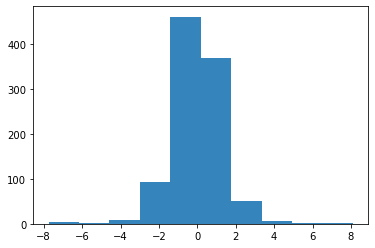

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(samples, histtype='stepfilled', alpha=0.9)
plt.show()

No handles with labels found to put in legend.


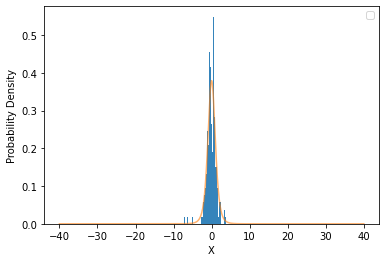

In [16]:
# Plot the histogram of the samples
plt.hist(samples, bins=300,density=True, alpha = 0.9)

x = np.linspace(-40,40,1000)

# Calculate the PDF values for the t distribution with 5 degrees of freedom
pdf_values = t.pdf(x, df=5)

# Plot the PDF curve on top of the histogram
plt.plot(x, pdf_values, alpha = 0.6)

# Set the axis labels and legend
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


## 2nd Method

In [13]:
k = 5
# Set number of samples to generate
n = 10000

startTime = datetime.datetime.now()
chi_samples = []
while len(chi_samples) < n:
    
    l = []
    while len(l) <= k:

        # Generate a random number between 0 and 1
        u = random.uniform(0, 1)
        y = random.uniform(0, 1)
        w = random.uniform(0, 1)

        if -2*math.log(y) >= (math.log(u) + 1)**2:
            z = -math.log(u)
        if w >= 0.5:
            x = z
        else:
            x = -z
        l.append(x)

    chi = sum(i*i for i in l)
    chi_samples.append(chi)
    
n1 = np.random.normal(0, 1,10000)
n = n1.tolist()
chi_samples = [x / k for x in chi_samples]
sqrt = [math.sqrt(num) for num in chi_samples]
result = []

# get last index for the lists for iteration
end_index = len(sqrt)

for i in range(end_index):
    result.append(n[i]/sqrt[i])
    
endTime = datetime.datetime.now()

In [14]:
print(endTime - startTime) 

0:00:00.286039


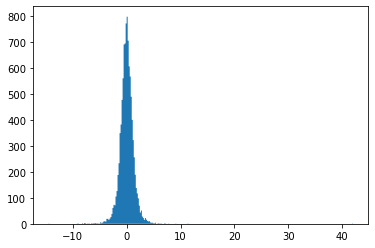

In [15]:
fig, ax = plt.subplots(1, 1)
ax.hist(result,bins = 300, histtype='stepfilled')
plt.show()

No handles with labels found to put in legend.


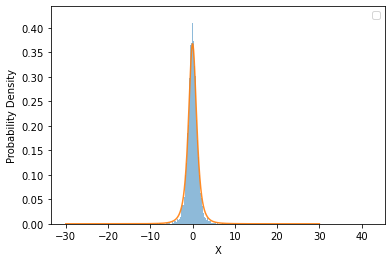

In [17]:
# Plot the histogram of the samples
plt.hist(result, bins=300,density=True, alpha = 0.5)

x = np.linspace(-30,30,10000)

# Calculate the PDF values for the t distribution with 3 degrees of freedom
pdf_values = t.pdf(x, df=3)

# Plot the PDF curve on top of the histogram
plt.plot(x, pdf_values, alpha = 0.9)

# Set the axis labels and legend
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()